# **News Scrapper**.
The Websites that we are going to use for the assignment are 
- "THE HIMALAYAN TIMES" (https://thehimalayantimes.com/)
- AL Jazeera https://www.aljazeera.com/
- The Jakarta Post https://www.thejakartapost.com/
- The Hindu www.thehindu.com

The *robots.txt* file of the news page is given below. Since we are parsing a few hundred pages that shouldn't cause any trouble to the webserver.

https://thehimalayantimes.com/robots.txt

## The Structure of the Assigment

- Importing libraries
- Accessing a single news article from a news website and appending it to the Pandas Dataframe.
- After showing the results, we will then grab bunch of articles from each of the above listed websites and make a list of all of them.
- we then apped all the lists together
- As some news may be repeated in multiple times in the list delete the duplicated elements.
- Finally we download the CSV file of news articles.

---

# 01. Importing the libraries:

- We import "*request*" to download our website we need to parse on.
- We then import "*BeautifulSoup*" This library helps us with getting HTML structure of any page that we want to work with and provides functions to access specific elements and extract relevant info.
- We will also import *urllib* to prevent the server from getting overwhelming and caching the content.
- Finally we also import "*pandas*" to make the dataframe. 


In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.request, sys, time
import pandas as pd

---
# 02. Accessing the page using the requests.get function 

In [ ]:
page = requests.get("https://thehimalayantimes.com/")

# To know if the page loaded correctly we need to check if the page status code = 200.
page.status_code

200

 A successfull loaded page gives "200" as the status code. Therefore PAGE LOADED SUCCESSFULLY

Now, The sleep() function suspends execution of the current thread for a given number of seconds. Here we have taken 2 seconds.

In [ ]:
time.sleep(2)

---
# 03. Parsing the content now with BeautifulSoup and prettifying the HTML.


In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

## This will be a huge output for all the HTML code of the page.

Since all of the news articles in the above newslink "The Himalayan Times" is stored under the (h3 class = "alith_post_title"), we can select our newsarticle content from it using the soup find_all method. The number of articles that we could gather using the following approach are given below.



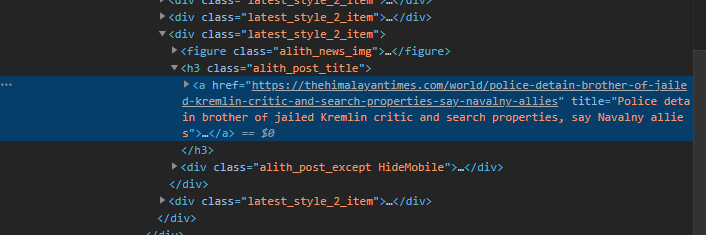

In [ ]:
# The number of articles having this tag are:

print(len(soup.find_all(class_ = "alith_post_title")))


25


---
# 04. The articles are:

In [ ]:
soup.find_all(class_ = "alith_post_title")

[<h3 class="alith_post_title">
 <a href="https://thehimalayantimes.com/world/british-pm-johnson-heads-to-scotland-to-argue-against-the-breakup-of-uk" title="British PM Johnson heads to Scotland to argue against the breakup of UK"><strong>British PM Johnson heads to Scotland to argue against the breakup of UK</strong></a>
 </h3>,
 <h3 class="alith_post_title fontsize18height44 "><a href="https://thehimalayantimes.com/business/need-for-political-stability-emphasised" title="Need for political stability emphasised">Need for political stability emphasised </a></h3>,
 <h3 class="alith_post_title fontsize18height44 "><a href="https://thehimalayantimes.com/kathmandu/craze-for-sanskrit-increasing" title="Craze for Sanskrit increasing">Craze for Sanskrit increasing </a></h3>,
 <h3 class="alith_post_title fontsize18height44 "><a href="https://thehimalayantimes.com/kathmandu/hearing-on-house-dissolution-case-underway-at-supreme-court" title="Hearing on House Dissolution case underway at Supreme C

Selecting Just one Article from it and prettyfying it we get.

In [ ]:
list_articles_1 = soup.find_all(class_ = "alith_post_title")[0]
print(list_articles_1.prettify())

<h3 class="alith_post_title">
 <a href="https://thehimalayantimes.com/world/british-pm-johnson-heads-to-scotland-to-argue-against-the-breakup-of-uk" title="British PM Johnson heads to Scotland to argue against the breakup of UK">
  <strong>
   British PM Johnson heads to Scotland to argue against the breakup of UK
  </strong>
 </a>
</h3>



---
# 05. From this we extract the content using get_text().

In [ ]:
title_1 = list_articles_1.get_text()
title_1.replace("\n", '')

'British PM Johnson heads to Scotland to argue against the breakup of UK'

Similary We can access the news content from other websites like the above method..
Now, we run the whole code extracting different articles from various news websites and make data frame of their own.

---
# 06. News from The Himalayan Times

In [ ]:
# List of sections : World, Business, Sports, Lifesytle, Entertainment, Science, Environment, Health
#here the acronym ht stads for himalays time in the variable name

sections_ht = ['World?', 'Business?', 'Sports?', 'Lifestyle?', 'Entertainment?', 'Science?', 'Environment?', 'Health?']
Page_nos_ht = ['pgno = 1', 'pgno = 2', 'pgno = 3', 'pgno = 4', 'pgno = 5', 'pgno = 6', 'pgno = 7', 'pgno = 8', 'pgno = 9', 'pgno = 10']

# So, our link would look like 'https://thehimalayantimes.com/morearticles/' + str('section?') + str('pgno=i')
# where the value in link could be substituted to any section from the sections list and passing down the different page number value

page_ht = requests.get("https://thehimalayantimes.com/morearticles/" + str("World?") + str("pgno = 1"))

# To know if the page loaded correctly we need to check if the page status code = 200.

page.status_code

200

As, the page runs We can loop over the pages and append the pandas dataframe.

In [ ]:
# This empty list will contain all the title of the news articles
news_articles_list_ht = [ ]

# The first loop will pass strings from different sections
for i in range(len(sections_ht)):

#The second loop would help us traverse different pages of the section in the webpage  
  for j in range(len(Page_nos_ht)):

    # Requesting the page from requests.get()
    pages = requests.get("https://thehimalayantimes.com/morearticles/" + str(sections_ht[i]) + str(Page_nos_ht[j]))
    
    #Parsing it through BeautifulSoup
    soup_ht = BeautifulSoup(pages.content, 'html.parser')

    # This loop would iterate over all thar articles which have the same class 
    for k in range(len(soup_ht.find_all(class_ = "alith_post_title HideMobile"))):
      news_article_ht = soup_ht.find_all(class_ = "alith_post_title")[k]
      news_title_ht = news_article_ht.get_text()
      news_articles_list_ht.append(news_title_ht.replace("\n", ''))

 # all the articles from Himalaya times are stored in our list
print("Number of articles extracted from Himalayas Times are:" + str(len(news_articles_list_ht)))  



Number of articles extracted from Himalayas Times are:1200


---
# 07. News from AlJazeera

In [ ]:
# List of sections : World, Business, Sports, Lifesytle, Entertainment, Science, Environment, Health
sections_aj = ['coronavirus-pandemic/', 'features/', 'economy/', 'climate/', 'sports/', 'science-and-technology/']

# So, our link would look like 'https://www.aljazeera.com/tag/' + str(sections_1)
# where the value in link could be substituted to any section from the sections_1 list 

page_aj = requests.get('https://www.aljazeera.com/tag/' + str('science-and-technology/'))

# To know if the page loaded correctly we need to check if the page status code = 200.
page_aj.status_code

200

In [ ]:
news_articles_list_aj = [ ]

for i in range(len(sections_aj)):

    pages_aj = requests.get('https://www.aljazeera.com/tag/' + str(sections_aj[i]))

    soup_aj = BeautifulSoup(pages_aj.content, 'html.parser')

    for k in range(len(soup_aj.find_all(class_ = "gc__title"))):
      news_article_aj = soup_aj.find_all(class_ = "gc__title")[k]
      news_title_aj = news_article_aj.get_text()
      news_articles_list_aj.append(news_title_aj.replace("\n", ''))



print("Number of articles extracted from Al jazeera are:" + str(len(news_articles_list_aj)))
  

Number of articles extracted from Al jazeera are:72


---
# 08. News from Jakarta Post

In [ ]:
# List of sections : World, Business, Sports, Lifesytle, Entertainment, Science, Environment, Health
sections_jp = ['world', 'sport', 'business']

# So, our link would look like 'https://www.thejakartapost.com/news/' + str(sections_jp)
# where the value in link could be substituted to any sections_jp from the sections_1 list 

page_jp = requests.get('https://www.thejakartapost.com/news/' + str('world'))

# To know if the page loaded correctly we need to check if the page status code = 200.
page_jp.status_code

200

In [ ]:
news_articles_list_jp = [ ]

for i in range(len(sections_jp)):

    pages_jp = requests.get('https://www.thejakartapost.com/news/' + str(sections_jp[i]))

    soup_jp = BeautifulSoup(pages_jp.content, 'html.parser')

    for k in range(len(soup_jp.find_all(class_ = "titleNews"))):
      news_article_jp = soup_jp.find_all(class_ = "titleNews")[k]
      news_title_jp = news_article_jp.get_text()
      news_articles_list_jp.append(news_title_jp.replace("\n", ''))

print("Number of articles extracted from The Jarkarta Post:" + str(len(news_articles_list_jp)))


Number of articles extracted from The Jarkarta Post:94


---
# 09. News From THE HINDU

In [ ]:
# List of sections : World, Business, Sports, Lifesytle, Entertainment, Science, Environment, Health
sections_th = ['news/national/', 'news/international/', 'business/Industry/', 'sport/', 'entertainment/', 'sci-tech/science/']
Page_nos_th = ['?page=1', '?page=2', '?page=3', '?page=4', '?page=5', '?page=6']

# So, our link would look like 'https://www.thehindu.com/' + str(sci-tech/science/) + str(?page=2)
# where the value in link could be substituted to any section from the sections list and passing down the different page number value

page_th = requests.get("https://www.thehindu.com/" + str("sci-tech/science/") + str("?page=2"))

# To know if the page loaded correctly we need to check if the page status code = 200.
page_th.status_code

200

In [ ]:
news_articles_list_th = [ ]

for i in range(len(sections_th)):
  for j in range(len(Page_nos_th)):
    pages_th = requests.get("https://thehindu.com/" + str(sections_th[i]) + str(Page_nos_th[j]))

    soup_th = BeautifulSoup(pages_th.content, 'html.parser')

    for k in range(len(soup_th.find_all(class_ = "Other-StoryCard"))):
      news_article_th = soup_th.find_all(class_ = "Other-StoryCard")[k]
      news_title_th = news_article_th.get_text()
      news_articles_list_th.append(news_title_th.replace("\n", ''))



print("Number of articles extracted from Himalayas Times are:" + str(len(news_articles_list_th)))
  

Number of articles extracted from Himalayas Times are:1260


---
# 10. Join the lists

We gathered:
- 1200 articles from The Himalayas Times
- 72 articles from Al jazeera
- 94 articles from The Jakarta Post
- 1260 articles from The Hindu

In [ ]:
# Joining all the lists into one
news_articles_list = news_articles_list_ht + news_articles_list_aj + news_articles_list_jp + news_articles_list_th

# deleting the duplicated elements of the list
news_list = [] 
for i in news_articles_list: 
    if i not in news_list: 
        news_list.append(i) 

# Converting the list to Pandas dataframe:
News_dataframe = pd.DataFrame({"Title_news":news_list})


print("the total number of articles in the dataframe are" + str(len(News_dataframe)))



the total number of articles in the dataframe are1438


--- 
# 11. Downloading the csv file.


In [ ]:
# converting the data frame into a CSV file
News_dataframe.to_csv('News_file.csv')

#since The program was run in GOOGLE COlab we need to download the CSV FILE
from google.colab import files
files.download("News_file.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>